# Исследование надежности заемщиков

Задача -- необходимо установить признаки, влияющие на факт погашения кредита в срок (проанализировать от чего заисит debt). 

Описание данных

|Признак|Описание|
|--:|:--|
|children | количество детей в семье|
|days_employed | общий трудовой стаж в днях|
|dob_years | возраст клиента в годах|
|education | уровень образования клиента|
|education_id | идентификатор уровня образования|
|family_status | семейное положение|
|family_status_id | идентификатор семейного положения|
|gender | пол клиента|
|income_type | тип занятости|
|debt | имел ли задолженность по возврату кредитов|
|total_income | ежемесячный доход|
|purpose | цель получения кредита|


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


# Предобработка

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
df.isna().mean()

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

Видим прорущенные значения в признаках days_employed и total_income по 10% в каждом

In [6]:
df.duplicated().sum()

54

In [7]:
df.drop_duplicates(inplace=True)

Удалили дубликаты из таблицы 

In [8]:
percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99] 
df.describe(percentiles = percentiles) 

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21471.000000,19351.000000,21471.000000,21471.000000,21471.000000,21471.000000,1.935100e+04
mean,0.539565,63046.497661,43.279074,0.817195,0.973685,0.081086,1.674223e+05
std,1.382978,140827.311974,12.574291,0.548508,1.421082,0.272974,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
1%,0.000000,-10697.267671,21.000000,0.000000,0.000000,0.000000,4.365679e+04
5%,0.000000,-6622.968349,25.000000,0.000000,0.000000,0.000000,6.332285e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
90%,2.000000,360310.974923,60.000000,1.000000,4.000000,0.000000,2.784149e+05


#### Обрабатываем аномальные значения

Обработка признака children

In [9]:
df.groupby('children')['debt'].agg(['count', 'mean'])

,count,mean
children,,
-1,47,0.021277
0,14107,0.075353
1,4809,0.092327
2,2052,0.094542
3,330,0.081818
4,41,0.097561
5,9,0.000000
20,76,0.105263


Заменяем -1 на 1, 20 на медианное значение

In [10]:
df.children = df.children.replace(-1, 1)
df.children = df.children.replace(20, df.children.median())

Обработка признака days_employed

In [11]:
def to_positive(val):
    if val < 0:
        val *= -1
    return val

In [12]:
df.days_employed = df.days_employed.apply(to_positive)

Создали функцию по замене отрицательных значений на положительные и применили ее к признаку days_employed

<Axes: >

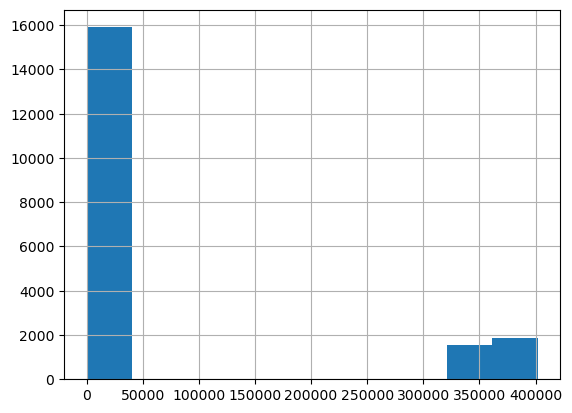

In [13]:
df.days_employed.hist()

In [14]:
df_cut = df.query('days_employed < 30000')

In [15]:
days_empl_mean = df_cut.days_employed.mean()
days_empl_mean

2353.0159319988766

In [16]:
df.loc[df['days_employed'] > 30000, 'days_employed'] = days_empl_mean

In [17]:
df.days_employed = df.days_employed.fillna(days_empl_mean)

In [18]:
df.days_employed.describe()

count    21471.000000
mean      2353.015932
std       1983.258168
min         24.141633
25%       1024.274090
50%       2353.015932
75%       2522.536607
max      18388.949901
Name: days_employed, dtype: float64

В признаке days_employed заменили отрицательные значения на положительные.
    В столбце присутствует большое количество крайне аномальных (невозможных) значении (более 300 000 дней стажа). Что сильно повлияет на дальнейший анализ. На практике, лучше всего было бы сходить к операторам, которые вносили данные, узнать с чем связана ошибка. В текущих условиях, был создан новый датафрейм df_cut, с вырезанными экстримальными значениями, по df_cut посчитана средняя признака. В оригинальной таблице были заменены аномальные значения на среднее df_cut.
  Аналогично и с пропущенными значениями признака days_employed

Обработка признака dob_years

In [19]:
df.query('dob_years == 0').dob_years.count()

101

In [20]:
df = df[df['dob_years'] != 0]

Удалили строки со значеним возраста клиента = 0

Обработка признака education

In [21]:
df.education.unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [22]:
df.education = df.education.str.lower()

Привели все значения признака к нижнему регистру

Обработка признака education

In [23]:
df.gender.unique()

array(['F', 'M', 'XNA'], dtype=object)

In [24]:
df.query('gender == "XNA"').gender.count()

1

In [25]:
df = df[df['gender'] != "XNA"]

Обработка признака total_income

In [26]:
total_income_median = df['total_income'].median()

In [27]:
df['total_income'] = df['total_income'].fillna(total_income_median)

In [28]:
df['total_income'] = df['total_income'].astype('int')

In [29]:
df['total_income'].median()

145005.0

# Анализ

In [30]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,2353.015932,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


In [31]:
df['dob_years_group'] = pd.qcut(df.dob_years, 5)

In [32]:
df.groupby('dob_years_group')['debt'].agg(['count', 'mean'])

,count,mean
dob_years_group,,
"(18.999, 31.0]",4277,0.111994
"(31.0, 39.0]",4566,0.092422
"(39.0, 47.0]",4313,0.078600
"(47.0, 56.0]",4352,0.065717
"(56.0, 75.0]",3861,0.053613


<Axes: xlabel='dob_years_group'>

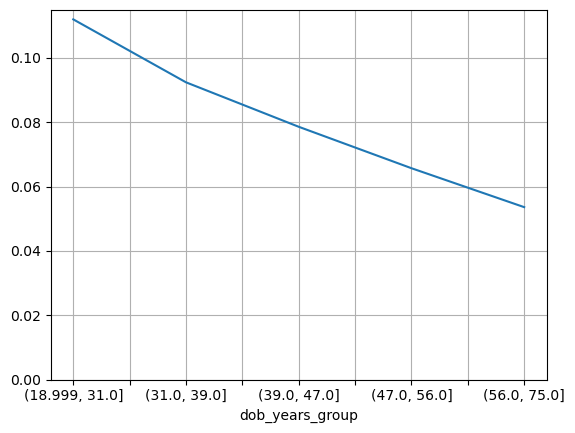

In [33]:
df.groupby('dob_years_group')['debt'].mean().plot(ylim=0, grid=True)

Люди молодого возраста являются самыми рискованными заемщиками. С возрастом, надежность повышается

In [34]:
df.groupby('gender')['debt'].agg(['count', 'mean'])

,count,mean
gender,,
F,14117,0.070057
M,7252,0.102592


Видим перекос по количесву кредитов в сторону женщин (в 2 раза больше), причем процент должников среди мужчин на 3.2% выше. Возможно влияние другой переменной.

In [35]:
df.groupby('gender')['dob_years'].agg(['count', 'mean', 'median'])

,count,mean,median
gender,,,
F,14117,44.684919,44.0
M,7252,41.147821,40.0


 В среднем, возраст мужчин ниже, чем у женщин. Но при этом, они все равно относятся к одной возрастной группе из анализа выше.

In [36]:
df.groupby('gender')['days_employed'].agg(['count', 'mean', 'median'])

,count,mean,median
gender,,,
F,14117,2469.437654,2353.015932
M,7252,2127.942067,1961.841819


In [37]:
df.groupby('gender')['total_income'].agg(['count', 'mean', 'median'])

,count,mean,median
gender,,,
F,14117,153228.070695,143501.0
M,7252,188638.520270,159004.0


Стаж мужчин в нашей выборке ниже, чем у женщин, но при этом доходы выше

In [38]:
df.groupby(['dob_years_group', 'gender'])['debt'].agg(['count', 'mean'])

count      mean
dob_years_group gender                 
(18.999, 31.0]  F        2500  0.102400
                M        1777  0.125492
(31.0, 39.0]    F        2793  0.087361
                M        1773  0.100395
(39.0, 47.0]    F        2798  0.066476
                M        1515  0.100990
(47.0, 56.0]    F        3082  0.053212
                M        1270  0.096063
(56.0, 75.0]    F        2944  0.047215
                M         917  0.074155

У мужчин и женщин картина по возврату долгов с возрастом улучшается .Женщины во всех возрастных группах являются более надежными плательщиками. При чем разрыв в возрате займа между полами растет с возрастом  

In [39]:
df.groupby('education')['debt'].agg(['count', 'mean'])

,count,mean
education,,
высшее,5216,0.053106
начальное,282,0.109929
неоконченное высшее,741,0.091768
среднее,15124,0.089725
ученая степень,6,0.000000


Видим, что люди с высшим образованием имеют самый низкий процент по наличию просрочек платежей, а люди с начальным - самы высокий

In [40]:
df['total_income_group'] = pd.cut(df['total_income'], bins=[0, 40000, 70000, 120000, 150000, 200000, 300000, float('inf')])

In [41]:
df.groupby('total_income_group')['debt'].agg(['count', 'mean'])

,count,mean
total_income_group,,
"(0.0, 40000.0]",124,0.080645
"(40000.0, 70000.0]",1345,0.067658
"(70000.0, 120000.0]",5339,0.083724
"(120000.0, 150000.0]",5424,0.085361
"(150000.0, 200000.0]",4098,0.089068
"(200000.0, 300000.0]",3561,0.070486
"(300000.0, inf]",1478,0.071719


<Axes: xlabel='total_income_group'>

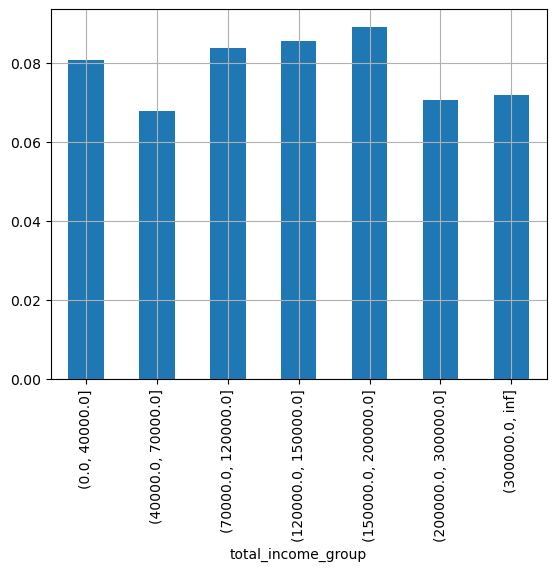

In [42]:
df.groupby('total_income_group')['debt'].mean().plot(grid=True, kind='bar')

Видим интересную картину, люди с невысоким доходом (40к-70к) имеют наименьшее количество просрочек по кредитам, затем по надежности идут граждане с наибольшими доходами (200к+)

In [43]:
df.groupby('children')['debt'].agg(['count', 'mean'])

,count,mean
children,,
0,14112,0.075539
1,4840,0.091322
2,2039,0.095145
3,328,0.082317
4,41,0.097561
5,9,0.000000


Людей с 5 детьми чрезмерно мало, поэтому игнорируем как шум. Картинка складывается следующая: наиболее надежныен заемщики - люди без детей

In [44]:
df['days_employed_group'] = pd.qcut(df.days_employed, 5)

In [45]:
df.groupby('days_employed_group')['debt'].agg(['count', 'mean'])

,count,mean
days_employed_group,,
"(24.141, 818.527]",4274,0.112307
"(818.527, 1810.794]",4274,0.091951
"(1810.794, 2353.016]",7033,0.068534
"(2353.016, 2994.739]",1514,0.081242
"(2994.739, 18388.95]",4274,0.059663


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 [Text(-0.5, 0, ''),
  Text(0.0, 0, '(24.141, 818.527]'),
  Text(0.5, 0, ''),
  Text(1.0, 0, '(818.527, 1810.794]'),
  Text(1.5, 0, ''),
  Text(2.0, 0, '(1810.794, 2353.016]'),
  Text(2.5, 0, ''),
  Text(3.0, 0, '(2353.016, 2994.739]'),
  Text(3.5, 0, ''),
  Text(4.0, 0, '(2994.739, 18388.95]'),
  Text(4.5, 0, '')])

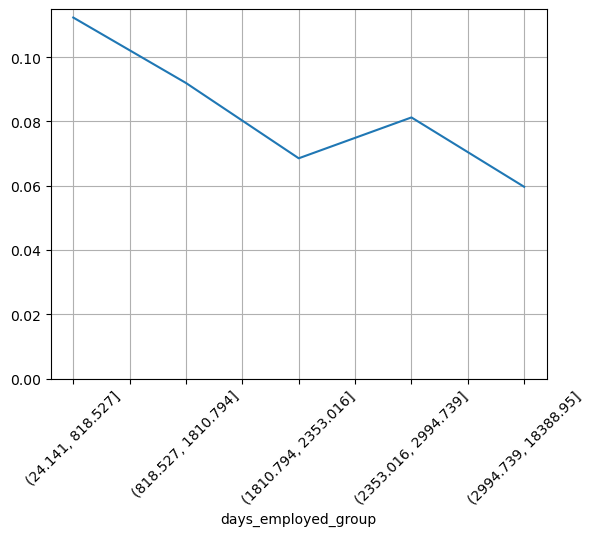

In [46]:
df.groupby('days_employed_group')['debt'].agg('mean').plot(grid=True, ylim=0)
plt.xticks(rotation=45)

Как и ожидалось, люди из группы с наименьшим трудовым стажем имеюют наиболее частые просрочки, далее процент понижается. Произошел рост просрочек для категории 6.5-8 лет стажа

In [47]:
df.groupby('family_status')['debt'].agg(['count', 'mean'])

,count,mean
family_status,,
Не женат / не замужем,2794,0.097709
в разводе,1185,0.071730
вдовец / вдова,954,0.064990
гражданский брак,4141,0.093214
женат / замужем,12295,0.075397


Наиболее надежная категория граждан по семеному статусу - вдовец / вдова. Самая рисковая - Не женат / не замужем и гражданский брак. В разводе и люди в браке являются достаточно надежными заемщиками

In [48]:
df.purpose.unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [49]:
categories = {
    'Недвижимость': ['жиль', 'недвижим'],
    'Автомобиль': ['авто'],
    'Образование': ['образован'],
    'Свадьба': ['свад']
}

In [50]:
def categorize_credit(goal):
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in goal:
                return category
    return 'Другое'

In [51]:
df['purpose_group'] = df['purpose'].apply(categorize_credit)

In [52]:
grouped = df.groupby('purpose_group').size().reset_index(name='Количество')
grouped

,purpose_group,Количество
0,Автомобиль,4286
1,Недвижимость,10766
2,Образование,3996
3,Свадьба,2321


Сгруппировали цели получения кредита на 4 категории для дальнейшего анализа

In [53]:
df.groupby('purpose_group')['debt'].agg(['count', 'mean'])

,count,mean
purpose_group,,
Автомобиль,4286,0.093327
Недвижимость,10766,0.072357
Образование,3996,0.092593
Свадьба,2321,0.079276


Изучив цели получения кредита, видим, что по займу на недвижимость, банк получает наиболее регулярные выплаты

In [54]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_group,total_income_group,days_employed_group,purpose_group
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"(39.0, 47.0]","(200000.0, 300000.0]","(2994.739, 18388.95]",Недвижимость
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"(31.0, 39.0]","(70000.0, 120000.0]","(2994.739, 18388.95]",Автомобиль
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"(31.0, 39.0]","(120000.0, 150000.0]","(2994.739, 18388.95]",Недвижимость
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"(31.0, 39.0]","(200000.0, 300000.0]","(2994.739, 18388.95]",Образование
4,0,2353.015932,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"(47.0, 56.0]","(150000.0, 200000.0]","(1810.794, 2353.016]",Свадьба


# Результат исследования

На мой взгляд, в датасете не хватало крайне важного признака - размер кредита. По имеющимся данным получили следующие выводы.

**Влияние наличия детей:**
самыми ненадежными заемщиками являются многодетные семьи против семей без детей, у которых самая высокая доля погошения кредита. У семей без детей - 7,5%. У семей с детьми более 9%.

**Влияние возраста:** молодым людям выдавать кредит более рискованно, чем пожилым. Процент невыплат 11,2% против 5,4%.

**Влияние трудового стажа:** чем менбше стаж, тем больше проблем со своевременной выплатой. При стаже до 3 лет имеем 11,2% своевременно невыплаченных платежей, а при стаже более 8 лет показатель уменьшается до 6%.

**Влияние полученного образования:** люди с начальным образованием являются наиболее рискованной группой - 11% просрочек. Лидерами по возврату долгов являются граждане с высшим образованием - 5,3% просрочек.

**Влияние семейного положения:** наибольшую ответветственность можем наблюдать, у людей потерявших супруга (6,5% просрочек). У людей не вступивших в отношения, показатель самый худший - 9,8%.

**Влияние уровня заработной платы:** интересное наблюдение получилось по данному признаку. Оказывается, люди со средней заработной платой (и чуть выше) по стране, являются надежными заемщиками (категория 40000-70000 рублей, процент просрочек 6,8%), также, люди с самыми высокими доходами (200к+), возращают долги в срок с хорошим показателем (около 7%). Примечательно, что с ростом заработной платы от 70000 до 200000 рублей, своевременность выплат начинает страдать.

**Влияние целей получения кредита:** Наиболее надежная выдача средств - под ипотеку на покупку жилой недвижимости (просрочки в 7,2% случаях). А вот автокредитование является самой рисковой категорией - 9,3%, со схожим показателем - кредит на образование.

По результату исследования - женщины являются более надежными заемщиками, чем мужчины. 7% просрочек против 10,3%.



**Портрет идеального заемщика:**
  - женщина
  - пожилая возрастная группа 56+ лет
  - цель получения кредита: ипотека на недвижимость
  - вдова
  - рабочий стаж более 8 лет
  - без детей
  - заработная плата 40-70к или 200к+
  - с высшим образованием

**Портрет наиболее рискованного заемщика:**
  - молодой мужчина
  - возростная группа до 31 года
  - цель получения кредита: покупка автомобиля
  - семейное положение - не женат
  - стаж работы менее 3 лет
  - 2 или более детей
  - заработная плата 150-200к рублей
  - образование начальное
  
